In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


## 라이브러리 불러오기
- 주요 라이브러리 버전을 확인한다.

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns
import sklearn
import xgboost as xgb
import lightgbm as lgb

print("pandas version :", pd.__version__)
print("numpy version :", np.__version__)
print("matplotlib version :", mpl.__version__)
print("seaborn version :", sns.__version__)
print("scikit-learn version :", sklearn.__version__)
print("xgboost version :", xgb.__version__)
print("lightgbm version :", lgb.__version__)

pandas version : 1.3.5
numpy version : 1.21.6
matplotlib version : 3.5.2
seaborn version : 0.11.2
scikit-learn version : 1.0.2
xgboost version : 1.6.1
lightgbm version : 3.3.2


## 데이터 불러오기
- pandas 활용

In [3]:
DATA_PATH = '/kaggle/input/house-prices-advanced-regression-techniques/'
train = pd.read_csv(DATA_PATH + "train.csv")
test = pd.read_csv(DATA_PATH + "test.csv")

# sample_submission.csv
# data_description.txt

# 프로세스가 완성 되었을 때 표시가 나도록 print를 활용해주면 오류를 찾기 수월하
print("데이터 불어오기 완료!")

데이터 불어오기 완료!


## 데이터 둘러보기
- 데이터를 둘러봅니다
- train: 행 갯수 1460 열 갯수 81 (SalePrice 존재)
- test: 행 갯수 1459, 열 갯수 80 (SalePrice 칼럼 미존재)
- 포인트 : 열 갯수가 달라졌다. (행은 무관)
- 데이터에 관해 궁금한 점이 있으면 캐들 대회처의 Overview(개요)를 둘러보면 된다.

In [4]:
train.shape, test.shape

((1460, 81), (1459, 80))

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# SalePrice 컬럼 존재 X
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

## 데이터 시각화
- 여기에서는 생략
- 그러나 기본적으로 종속변수 분포 확인은 해야한다!

### 정규분포인가 확인
  + 샤피로 검정
  + 정규분포 X : 로그 변환, 박스콕스 변환 등등
  + 정규분포로 만들어 줘야 한다.(좌우 대칭)
- 선형모델의 성능을 올리기 위해 필요하다.

평균:  180921.19589041095
표준편차 79415.29188606751


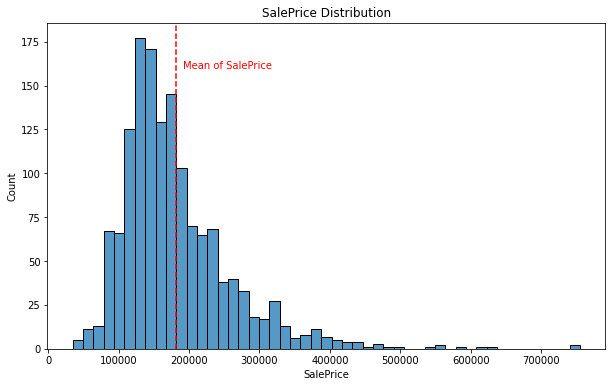

In [7]:
import matplotlib.pyplot as plt
from scipy.stats import norm


(mu, sigma) = norm.fit(train["SalePrice"])
print("평균: ", mu)
print("표준편차", sigma)

fig, ax = plt.subplots(figsize=(10,6))
sns.histplot(train['SalePrice'])
# 제목
ax.set(title="SalePrice Distribution")
# 평균선 그어주기
ax.axvline(mu,color = 'r', linestyle = '--')
# SalePrice 평균가라는 텍스트를 적어주기_ 숫자는 좌표
ax.text(mu + 10000, 160, 'Mean of SalePrice', color='r')
plt. show()

# 평균, 정규분포
# 그래프 뿐만 아니라 간단한 통계 수치도 함께 표시해 줘야 한다. (from~sigma까지가 이에 대한 코드)



### 비정규분포를 정규분포로 변환
- 로그변환을 해서 정규분포로 변환해준다.
- 모든 분석이 끝나고 지수변환해주면 다시 수치가 돌아온다.
- 로그변환은 한 번만 해줘야한다. 여러번하면 당연히 안된다.

평균:  12.024057394918406
표준편차 0.39931245219387496


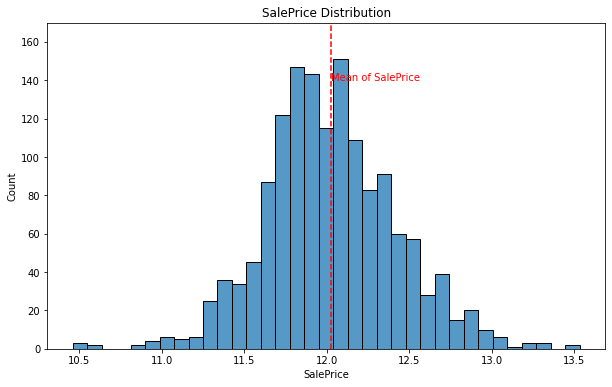

In [8]:
# 로그변환, log1p <- 숫자 1
train['SalePrice'] = np.log1p(train['SalePrice'])

(mu, sigma) = norm.fit(train["SalePrice"])
print("평균: ", mu)
print("표준편차", sigma)

fig, ax = plt.subplots(figsize=(10,6))
sns.histplot(train['SalePrice'])
# 제목
ax.set(title="SalePrice Distribution")
# 평균선 그어주기
ax.axvline(mu,color = 'r', linestyle = '--')
# SalePrice 평균가라는 텍스트를 적어주기_ 숫자는 좌표
ax.text(mu + 0.0001, 140, 'Mean of SalePrice', color='r')
ax.set_ylim(0,170)
plt. show()

# 평균, 정규분포
# 그래프 뿐만 아니라 간단한 통계 수치도 함께 표시해 줘야 한다. (from~sigma까지가 이에 대한 코드)

In [9]:
train['SalePrice'][:10]

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
5    11.870607
6    12.634606
7    12.206078
8    11.774528
9    11.678448
Name: SalePrice, dtype: float64

## 데이터 전처리
- 컬럼 갯수가 많다?, 어떤 컬럼을 없앨 것인가?
- 머신러닝 연산 속도 높이기 위해
- 데이터 ID값 제거 (패턴이 없기 때문)
- 머신러닝은 뭐다? 패턴이다!

In [10]:
train['Id'][:10]

0     1
1     2
2     3
3     4
4     5
5     6
6     7
7     8
8     9
9    10
Name: Id, dtype: int64

In [11]:
# 혹시 모르니 영구삭제 X, 따로 빼두기
train_ID = train['Id']
test_ID = test['Id']

# 데이터 삭제
train = train.drop(['Id'], axis = 1)
train.shape

(1460, 80)

In [12]:
test = test.drop(['Id'], axis = 1)
test.shape

(1459, 79)

### Y 값 추출
- train데이터에 SalePrice만 따로 저장한다.

In [13]:
y = train['SalePrice']
y
train = train.drop('SalePrice', axis = 1)
train.shape

(1460, 79)

In [14]:
test.shape

(1459, 79)

### 데이터 합치기
- 비추, 강의용
- train 따로 정리, test 따로 정리 추천
- Data Leakage 오류를 범할 가능성이 높음.

In [15]:
all_df = pd.concat([train,test]).reset_index(drop=True)
all_df.shape

(2919, 79)

## 결측치 확인
- 결측치 비율 확인하는 사용자 정의 함수 작성
- 추후에 코드 분석 해보

In [16]:
# 결측치 비율을 알려준다.
def check_na(data, head_num = 6):
  isnull_na = (data.isnull().sum() / len(data)) * 100
  data_na = isnull_na.drop(isnull_na[isnull_na == 0].index).sort_values(ascending=False)
  missing_data = pd.DataFrame({'Missing Ratio' :data_na, 
                               'Data Type': data.dtypes[data_na.index]})
  print("결측치 데이터 컬럼과 건수:\n", missing_data.head(head_num))

check_na(all_df, 20)

# 결측치가 높으면 패턴이 발견되기 어렵다 -> 지우기!
# 컬럼 지우기는 신중하게

결측치 데이터 컬럼과 건수:
               Missing Ratio Data Type
PoolQC            99.657417    object
MiscFeature       96.402878    object
Alley             93.216855    object
Fence             80.438506    object
FireplaceQu       48.646797    object
LotFrontage       16.649538   float64
GarageFinish       5.447071    object
GarageQual         5.447071    object
GarageCond         5.447071    object
GarageYrBlt        5.447071   float64
GarageType         5.378554    object
BsmtExposure       2.809181    object
BsmtCond           2.809181    object
BsmtQual           2.774923    object
BsmtFinType2       2.740665    object
BsmtFinType1       2.706406    object
MasVnrType         0.822199    object
MasVnrArea         0.787941   float64
MSZoning           0.137033    object
BsmtFullBath       0.068517   float64


### 결측치 제거
- 결측치 비율은 높은 변수들을 모두 제거하기로 한다.

In [17]:
# 혹시 모르니 영구삭제 X, 따로 빼두기
del_data = all_df[['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage']]
del_data

,PoolQC,MiscFeature,Alley,Fence,FireplaceQu,LotFrontage
0,NaN,NaN,NaN,NaN,NaN,65.0
1,NaN,NaN,NaN,NaN,TA,80.0
2,NaN,NaN,NaN,NaN,TA,68.0
3,NaN,NaN,NaN,NaN,Gd,60.0
4,NaN,NaN,NaN,NaN,TA,84.0
...,...,...,...,...,...,...
2914,NaN,NaN,NaN,NaN,NaN,21.0
2915,NaN,NaN,NaN,NaN,NaN,21.0
2916,NaN,NaN,NaN,NaN,TA,160.0
2917,NaN,Shed,NaN,MnPrv,NaN,62.0


In [18]:
all_df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2915,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2916,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
2917,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [19]:
type(all_df)

pandas.core.frame.DataFrame

In [20]:
# 데이터 삭제 방법 1

#all_df = all_df.drop(['PoolQC'], axis = 1)
#all_df = all_df.drop(['MiscFeature'], axis = 1)
#all_df = all_df.drop(['Alley'], axis = 1)
#all_df = all_df.drop(['Fence'], axis = 1)
#all_df = all_df.drop(['FireplaceQu'], axis = 1)
#all_df = all_df.drop(['LotFrontage'], axis = 1)
#all_df.shape

In [21]:
# 데이터 삭제 방법 2
#del_list = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage']
#for i in del_list:
#    all_df = all_df.drop([i], axis =1)
#all_df.shape

In [22]:
# 데이터 삭제 방법 3
all_df = all_df.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage'], axis = 1)
print(all_df.shape)
check_na(all_df)

(2919, 73)
결측치 데이터 컬럼과 건수:
               Missing Ratio Data Type
GarageCond         5.447071    object
GarageQual         5.447071    object
GarageYrBlt        5.447071   float64
GarageFinish       5.447071    object
GarageType         5.378554    object
BsmtCond           2.809181    object


## 결측치 채우기
- train 데이터와 test 데이터가 섞이면 안됨.
- train / test 분리해서 진행해야 함.
- object(문자데이터) : 자주 등장하는 빈도 값으로 채움
- 숫자데이터 : 평균값이 아닌, 중간값으로 채

In [23]:
# 결측치 확인
check_na(all_df,40)

결측치 데이터 컬럼과 건수:
               Missing Ratio Data Type
GarageCond         5.447071    object
GarageQual         5.447071    object
GarageYrBlt        5.447071   float64
GarageFinish       5.447071    object
GarageType         5.378554    object
BsmtCond           2.809181    object
BsmtExposure       2.809181    object
BsmtQual           2.774923    object
BsmtFinType2       2.740665    object
BsmtFinType1       2.706406    object
MasVnrType         0.822199    object
MasVnrArea         0.787941   float64
MSZoning           0.137033    object
Functional         0.068517    object
Utilities          0.068517    object
BsmtFullBath       0.068517   float64
BsmtHalfBath       0.068517   float64
GarageArea         0.034258   float64
GarageCars         0.034258   float64
TotalBsmtSF        0.034258   float64
KitchenQual        0.034258    object
Electrical         0.034258    object
BsmtUnfSF          0.034258   float64
BsmtFinSF2         0.034258   float64
BsmtFinSF1         0.034258   flo

### 문자형 데이터 결측치 채우기

In [24]:
# all_df['BsmtCond'].value_counts().index[0]
# TA(문자데이터의 자주 등장하는 빈도 값)를 뽑아내기 위해 아래 코드 사용
all_df['BsmtCond'].mode()[0]

'TA'

리스트

In [25]:
import numpy as np

# 문자열 데이터만 추출, all_df 말고 train 기준
cat_all_vars = train.select_dtypes(exclude=[np.number])
print("The whole number of all_vars", len(list(cat_all_vars)))

# 문자열 데이터 중에서 이미 기 삭제했던 Feature들이 있었기 때문에, 
# 한번 더 Feature를 정리하는 코드를 작성한다. 
# 따라서 38개의 Feature만 추출했다. 
final_cat_vars = []
for v in cat_all_vars:
    if v not in ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu']:
        final_cat_vars.append(v)

print("The whole number of final_cat_vars", len(final_cat_vars))

# 이제 각 Feature 마다 빈도수가 가장 많이 나타나는 값을 추가하는 코드를 작성한다. 
for i in final_cat_vars:
  all_df[i] = all_df[i].fillna(all_df[i].mode()[0])

# 이제 수치형 데이터만 남은 것을 확인한다. 
check_na(all_df, 20)

The whole number of all_vars 43
The whole number of final_cat_vars 38
결측치 데이터 컬럼과 건수:
               Missing Ratio Data Type
GarageYrBlt        5.447071   float64
MasVnrArea         0.787941   float64
BsmtFullBath       0.068517   float64
BsmtHalfBath       0.068517   float64
BsmtFinSF1         0.034258   float64
BsmtFinSF2         0.034258   float64
BsmtUnfSF          0.034258   float64
TotalBsmtSF        0.034258   float64
GarageCars         0.034258   float64
GarageArea         0.034258   float64


### 수치 데이터 결측치 채우기
- 수치형 데이터의 결측치를 추가할 수 있다.
- 평균이 아닌 중간값으로 진행한다.

In [26]:
import numpy as np

# 방법은 기존과 동일하다. 
# 이번에는 수치형 데이터만 추출한다. 
num_all_vars = list(train.select_dtypes(include=[np.number]))
print("The whole number of all_vars", len(num_all_vars))

# 수치형 데이터 중, 결측치가 많았던 `LotFrontage`만 처리한다. 
num_all_vars.remove('LotFrontage')
print("The whole number of final_cat_vars", len(num_all_vars))

# 이번에는 수치형 데이터의 평균이 아닌 중간값을 지정했다. 
for i in num_all_vars:
  all_df[i].fillna(value=all_df[i].median(), inplace=True)

check_na(all_df, 20)

The whole number of all_vars 36
The whole number of final_cat_vars 35
결측치 데이터 컬럼과 건수:
 Empty DataFrame
Columns: [Missing Ratio, Data Type]
Index: []


In [27]:
# 결측치 재확인
check_na(all_df,40)

결측치 데이터 컬럼과 건수:
 Empty DataFrame
Columns: [Missing Ratio, Data Type]
Index: []


In [28]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2919 non-null   object 
 2   LotArea        2919 non-null   int64  
 3   Street         2919 non-null   object 
 4   LotShape       2919 non-null   object 
 5   LandContour    2919 non-null   object 
 6   Utilities      2919 non-null   object 
 7   LotConfig      2919 non-null   object 
 8   LandSlope      2919 non-null   object 
 9   Neighborhood   2919 non-null   object 
 10  Condition1     2919 non-null   object 
 11  Condition2     2919 non-null   object 
 12  BldgType       2919 non-null   object 
 13  HouseStyle     2919 non-null   object 
 14  OverallQual    2919 non-null   int64  
 15  OverallCond    2919 non-null   int64  
 16  YearBuilt      2919 non-null   int64  
 17  YearRemodAdd   2919 non-null   int64  
 18  RoofStyl

## 도출 변수
- 새로운 도출 변수를 작성 (기존 변수 활용)
- 기존 변수 제거
- 도출 변수가 기존 변수를 대표한다.

### 두 개 변수를 추가해서 새로운 변수 생성
- 각 층의 면적으로 모두 더해 전체 면적으로 계산한 새로운 변수를 생성
- 1층 면적 + 2층 면적 = 전체 면적

In [29]:
# TotalSF에 대표성을 부여,이전 컬럼들 정리 삭제
all_df['TotalSF'] = all_df['TotalBsmtSF'] + all_df['1stFlrSF'] + all_df['2ndFlrSF']
all_df = all_df.drop(['TotalBsmtSF', '1stFlrSF', '2ndFlrSF'], axis=1)
print(all_df.shape)

(2919, 71)


In [30]:
all_df['Total_Bathrooms'] = (all_df['FullBath'] + (0.5 * all_df['HalfBath']) + all_df['BsmtFullBath'] + (0.5 * all_df['BsmtHalfBath']))
all_df['Total_porch_sf'] = (all_df['OpenPorchSF'] + all_df['3SsnPorch'] + all_df['EnclosedPorch'] + all_df['ScreenPorch'])
all_df = all_df.drop(['FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath', 'OpenPorchSF', '3SsnPorch', 'EnclosedPorch', 'ScreenPorch'], axis=1)
print(all_df.shape)

(2919, 65)


### 변수를 서로 가공하여 새로운 변수 생성
- 연도와 관련된 변수를 추출하는 코드

In [31]:
num_all_vars = list(train.select_dtypes(include=[np.number]))
year_feature = []
for var in num_all_vars:
  if 'Yr' in var:
    year_feature.append(var)
  elif 'Year' in var:
    year_feature.append(var)
  else:  
    print(var, "is not related with Year")
print(year_feature)

# 맨 밑에 연도와 관련된 변수만 모아줌
# ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold'] 

MSSubClass is not related with Year
LotFrontage is not related with Year
LotArea is not related with Year
OverallQual is not related with Year
OverallCond is not related with Year
MasVnrArea is not related with Year
BsmtFinSF1 is not related with Year
BsmtFinSF2 is not related with Year
BsmtUnfSF is not related with Year
TotalBsmtSF is not related with Year
1stFlrSF is not related with Year
2ndFlrSF is not related with Year
LowQualFinSF is not related with Year
GrLivArea is not related with Year
BsmtFullBath is not related with Year
BsmtHalfBath is not related with Year
FullBath is not related with Year
HalfBath is not related with Year
BedroomAbvGr is not related with Year
KitchenAbvGr is not related with Year
TotRmsAbvGrd is not related with Year
Fireplaces is not related with Year
GarageCars is not related with Year
GarageArea is not related with Year
WoodDeckSF is not related with Year
OpenPorchSF is not related with Year
EnclosedPorch is not related with Year
3SsnPorch is not rela

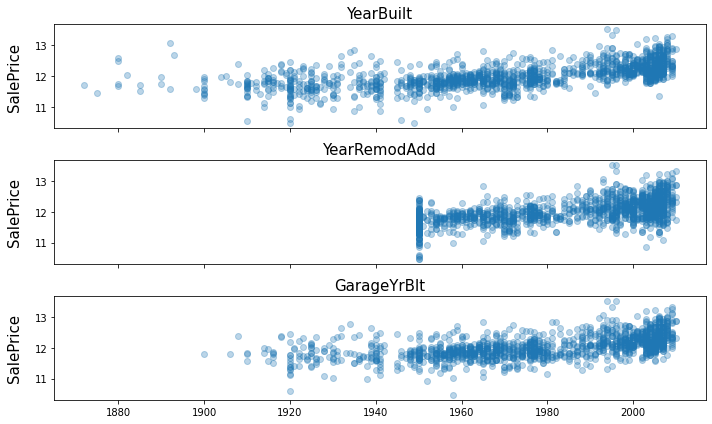

In [32]:
# X축은 연도, Y 축은 가격
fig, ax = plt.subplots(3, 1, figsize=(10, 6), sharex=True, sharey=True)
for i, var in enumerate(year_feature):
  if var != 'YrSold':
    ax[i].scatter(train[var], y, alpha=0.3)
    ax[i].set_title('{}'.format(var), size=15)
    ax[i].set_ylabel('SalePrice', size=15, labelpad=12.5)
plt.tight_layout()
plt.show()

# 세 그래프가 우상향 그래프, 서로 매우 유사함, 그렇기에 3개 변수 중 대표성을 띄는 변수 1개로 줄일 수 있다.

In [33]:
# 판매시기와 리모델링을 뺀 새로운 데이터
absall_df = all_df.drop(['YearBuilt', 'GarageYrBlt'], axis=1)
print(all_df.shape)

(2919, 65)


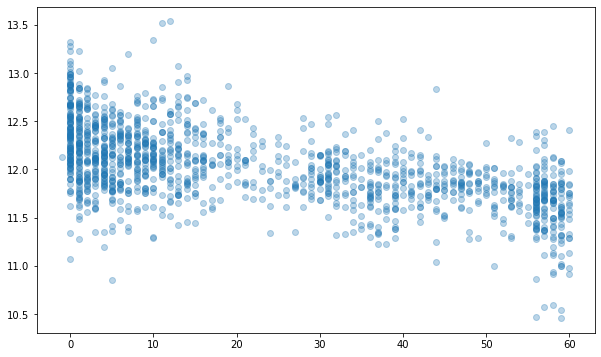

In [34]:
# 주택이 팔린 날짜 - 주택이 리모델링 된 날짜 -> 새로운 변수 창조
YearsSinceRemodel = train['YrSold'].astype(int) - train['YearRemodAdd'].astype(int)

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(YearsSinceRemodel, y, alpha=0.3)
plt.show()

In [35]:
# YearsSinceRemodel 이라는 새 변수 창조, 이전에 변수 삭제 정리
all_df['YearsSinceRemodel'] = all_df['YrSold'].astype(int) - all_df['YearRemodAdd'].astype(int)
all_df = all_df.drop(['YrSold', 'YearRemodAdd'], axis=1)
print(all_df.shape)

(2919, 64)


## 더미변수
- 더미변수란 원 데이터의 독립변수를 0과 1로 변환하는 변수를 말한다.
- ex) 수영장의 면적은 크게 중요하지 않다. 차라리 수영장이 있냐 없냐를 변수로 정하는게 더 좋다.

In [36]:
# 사용자 정의 함수 만들기
def count_dummy(x):
    if x > 0:
        return 1
    else:
        return 0

In [37]:
# apply 함수로 사용자 정의 함수를 사용할 수 있다.
all_df['PoolArea'] = all_df['PoolArea'].apply(count_dummy)
all_df['PoolArea'].value_counts()

0    2906
1      13
Name: PoolArea, dtype: int64

In [38]:
all_df['GarageArea'] = all_df['GarageArea'].apply(count_dummy)
all_df['GarageArea'].value_counts()

1    2762
0     157
Name: GarageArea, dtype: int64

In [39]:
all_df['Fireplaces'] = all_df['Fireplaces'].apply(count_dummy)
all_df['Fireplaces'].value_counts()

1    1499
0    1420
Name: Fireplaces, dtype: int64

## 인코딩
- 문자를 숫자로 변환해주는 코드를 인코딩 변환

In [40]:
all_df.info()
# 아직 문자열이 있기 때문에 머신러닝에 돌릴 수 없다.
# 문자를 숫자로 변환해 주어야한다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 64 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MSSubClass         2919 non-null   int64  
 1   MSZoning           2919 non-null   object 
 2   LotArea            2919 non-null   int64  
 3   Street             2919 non-null   object 
 4   LotShape           2919 non-null   object 
 5   LandContour        2919 non-null   object 
 6   Utilities          2919 non-null   object 
 7   LotConfig          2919 non-null   object 
 8   LandSlope          2919 non-null   object 
 9   Neighborhood       2919 non-null   object 
 10  Condition1         2919 non-null   object 
 11  Condition2         2919 non-null   object 
 12  BldgType           2919 non-null   object 
 13  HouseStyle         2919 non-null   object 
 14  OverallQual        2919 non-null   int64  
 15  OverallCond        2919 non-null   int64  
 16  YearBuilt          2919 

In [41]:
all_df.shape

(2919, 64)

### Label, Ordinal,One-Hot Encoding
- 문자열을 숫자열로 바꿔주는 방법 2가지 (서열, 명목)
    - 서열(1등급,2등급) : Label, Ordinal
      + 어떤 특정한 것이 가중치가 생길 수 있다. 동등X
    - 명목(남,여) : One-Hot Encoding

In [42]:
# 분류모형
# 종속변수 (양성, 음성)
# Label Encoder는 종속 변수에만 적용
# 정수

from sklearn.preprocessing import LabelEncoder
import pandas as pd

temp = pd.DataFrame({'Food_Name': ['Apple', 'Chicken', 'Broccoli'], 
                     'Calories': [95, 231, 50]})

encoder = LabelEncoder()
encoder.fit(temp['Food_Name'])
labels = encoder.transform(temp['Food_Name'])
print(list(temp['Food_Name']), "==>", labels)

['Apple', 'Chicken', 'Broccoli'] ==> [0 2 1]


In [43]:
# OrdinalEncoder는 독립변수에만 쓴다.
# 실수

from sklearn.preprocessing import OrdinalEncoder
import pandas as pd

temp = pd.DataFrame({'Food_Name': ['Apple', 'Chicken', 'Broccoli'], 
                     'Calories': [95, 231, 50]})

encoder = OrdinalEncoder()
labels = encoder.fit_transform(temp[['Food_Name']])
print(list(temp['Food_Name']), "==>", labels.tolist())

['Apple', 'Chicken', 'Broccoli'] ==> [[0.0], [2.0], [1.0]]


In [44]:
# pandas 메서드를 통해서 직접 숫자로 변환
temp = pd.DataFrame({'Food_Name': ['Apple', 'Chicken', 'Broccoli'], 
                     'Calories': [95, 231, 50]})

temp['Food_No'] = temp.Food_Name.replace(to_replace = ['Apple', 'Chicken', 'Broccoli'], value = [1, 2, 3])
print(temp[['Food_Name', 'Food_No']])

  Food_Name  Food_No
0     Apple        1
1   Chicken        2
2  Broccoli        3


### 원핫 인코딩

In [45]:
# 방법 1
import pandas as pd
from sklearn.preprocessing import LabelBinarizer

temp = pd.DataFrame({'Food_Name': ['Apple', 'Chicken', 'Broccoli'], 
                     'Calories': [95, 231, 50]})

encoder = LabelBinarizer()
encoder.fit(temp['Food_Name'])
transformed = encoder.transform(temp['Food_Name'])
ohe_df = pd.DataFrame(transformed)
temp = pd.concat([temp, ohe_df], axis=1).drop(['Food_Name'], axis=1)
temp.columns = ['Calories', 'Food_Name_Apple', 'Food_Name_Broccoli', 'Food_Name_Chicken']
print(temp)
print(temp.shape)

   Calories  Food_Name_Apple  Food_Name_Broccoli  Food_Name_Chicken
0        95                1                   0                  0
1       231                0                   0                  1
2        50                0                   1                  0
(3, 4)


In [46]:
# 방법 2 (더 간단, 추천)
import pandas as pd

temp = pd.DataFrame({'Food_Name': ['Apple', 'Chicken', 'Broccoli'], 
                     'Calories': [95, 231, 50]})

temp = pd.get_dummies(temp)
print(temp)
print(temp.shape)

   Calories  Food_Name_Apple  Food_Name_Broccoli  Food_Name_Chicken
0        95                1                   0                  0
1       231                0                   0                  1
2        50                0                   1                  0
(3, 4)


### 본 데이터 적용
- 여기서는 Ordinal Encoding 적용 안함. (단, 실전에서는 꼭 찾아서 해야함.)
- 원핫 인코딩 적용

In [47]:
all_df = pd.get_dummies(all_df).reset_index(drop=True)
all_df.shape
# 원핫 인코딩해줬기 때문에 칼럼 수가 늘어남

(2919, 260)

In [48]:
all_df.head(5)

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,LowQualFinSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,7,5,2003,196.0,706.0,0.0,150.0,0,...,0,0,0,1,0,0,0,0,1,0
1,20,9600,6,8,1976,0.0,978.0,0.0,284.0,0,...,0,0,0,1,0,0,0,0,1,0
2,60,11250,7,5,2001,162.0,486.0,0.0,434.0,0,...,0,0,0,1,0,0,0,0,1,0
3,70,9550,7,5,1915,0.0,216.0,0.0,540.0,0,...,0,0,0,1,1,0,0,0,0,0
4,60,14260,8,5,2000,350.0,655.0,0.0,490.0,0,...,0,0,0,1,0,0,0,0,1,0


### train, test 데이터 합쳐서 진행

### train, test 데이터 재분리

In [49]:
X = all_df.iloc[:len(y), :]
test = all_df.iloc[len(y):, :]

X.shape, y.shape, test.shape, all_df.shape

((1460, 260), (1460,), (1459, 260), (2919, 260))

In [50]:
X

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,LowQualFinSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,7,5,2003,196.0,706.0,0.0,150.0,0,...,0,0,0,1,0,0,0,0,1,0
1,20,9600,6,8,1976,0.0,978.0,0.0,284.0,0,...,0,0,0,1,0,0,0,0,1,0
2,60,11250,7,5,2001,162.0,486.0,0.0,434.0,0,...,0,0,0,1,0,0,0,0,1,0
3,70,9550,7,5,1915,0.0,216.0,0.0,540.0,0,...,0,0,0,1,1,0,0,0,0,0
4,60,14260,8,5,2000,350.0,655.0,0.0,490.0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,7917,6,5,1999,0.0,0.0,0.0,953.0,0,...,0,0,0,1,0,0,0,0,1,0
1456,20,13175,6,6,1978,119.0,790.0,163.0,589.0,0,...,0,0,0,1,0,0,0,0,1,0
1457,70,9042,7,9,1941,0.0,275.0,0.0,877.0,0,...,0,0,0,1,0,0,0,0,1,0
1458,20,9717,5,6,1950,0.0,49.0,1029.0,0.0,0,...,0,0,0,1,0,0,0,0,1,0


In [51]:
y

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
1455    12.072547
1456    12.254868
1457    12.493133
1458    11.864469
1459    11.901590
Name: SalePrice, Length: 1460, dtype: float64

In [52]:
test

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,LowQualFinSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1460,20,11622,5,6,1961,0.0,468.0,144.0,270.0,0,...,0,0,0,1,0,0,0,0,1,0
1461,20,14267,6,6,1958,108.0,923.0,0.0,406.0,0,...,0,0,0,1,0,0,0,0,1,0
1462,60,13830,5,5,1997,0.0,791.0,0.0,137.0,0,...,0,0,0,1,0,0,0,0,1,0
1463,60,9978,6,6,1998,20.0,602.0,0.0,324.0,0,...,0,0,0,1,0,0,0,0,1,0
1464,120,5005,8,5,1992,0.0,263.0,0.0,1017.0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,1936,4,7,1970,0.0,0.0,0.0,546.0,0,...,0,0,0,1,0,0,0,0,1,0
2915,160,1894,4,5,1970,0.0,252.0,0.0,294.0,0,...,0,0,0,1,1,0,0,0,0,0
2916,20,20000,5,7,1960,0.0,1224.0,0.0,0.0,0,...,0,0,0,1,1,0,0,0,0,0
2917,85,10441,5,5,1992,0.0,337.0,0.0,575.0,0,...,0,0,0,1,0,0,0,0,1,0


## 머시러닝을 위한 데이터 전처리가 끝났습니다.

## 과제
- 남은 시간동안 교제를 보고 머신러닝 학습 및 RMSE를 구하세요.
- 데이터셋 분리
  + X 데이터를 X_train, X_test, y_train, y_test로 분리

In [53]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(
    # 독립변수, 종속변수 
    X,         y, test_size = 0.3, random_state=0
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1022, 260), (438, 260), (1022,), (438,))

## 평가지표
- MAE, MSE, RMSE

### MAE
- 실제값과 예측값의 차이, 오차. 오차들의 절댓값 평균을 말함.

In [54]:
import numpy as np
def mean_absolute_error(y_true, y_pred):
    error =0
    for yt, yp in zip(y_true, y_pred):
        # yt : 실제값
        # yp : 예측값
        error = error + np.abs(yt - yp)
        # 절댓값 오차의 평균
    mae = error / len(y_true)
    return mae


def mean_squared_error(y_true, y_pred):
    error =0
    for yt, yp in zip(y_true, y_pred):
        # yt : 실제값
        # yp : 예측값
        error = error + (yt - yp) ** 2
        # 절댓값 오차의 평균
    mse = error / len(y_true)
    return mse


def root_mean_squared_error(y_true, y_pred):
    error =0
    for yt, yp in zip(y_true, y_pred):
        # yt : 실제값
        # yp : 예측값
        error = error + (yt - yp) ** 2
        # 절댓값 오차의 평균
    mse = error / len(y_true)
    
    # 제곱근 추가
    rmse = np.round(np.sqrt(mse), 3)
    return rmse


y_true = [400, 300, 800]
y_pred = [380, 320, 777]

print("MAE", mean_absolute_error(y_true, y_pred))
print("MSE", mean_squared_error(y_true, y_pred))
print("RMSE", root_mean_squared_error(y_true, y_pred))

MAE 21.0
MSE 443.0
RMSE 21.048


- sklearn 추가 자료 
- URL : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

In [55]:
# 실제 rmse 해야할 때 사용하는 함수 (간략)
from sklearn.metrics import mean_squared_error
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_ture, y_pred))

## 머신러닝 모형 정의, 검증 평가
- 교차 검증 함수 만들기
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

In [56]:
# 교차 검증
from sklearn.model_selection import KFold, cross_val_score 

# 모형 정의
from sklearn.linear_model import LinearRegression 

def cv_rmse(model, n_folds=5):
    cv = KFold(n_splits = n_folds, random_state=42, shuffle=True)
    rmse_list = np.sqrt(-cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv))
    print('CV RMSE Value List:', np.round(rmse_list, 4))
    print('CV RMSE mean List:', np.round(np.mean(rmse_list), 4))
    return rmse_list

In [57]:
rmse_scores = {} 
lr_model = LinearRegression()

score = cv_rmse(lr_model, n_folds=5)
print('linear regression - mean : {:.4f} (std: {:.4f})'.format(score.mean(), score.std()))

rmse_scores['Linear Regression'] = (score.mean(), score.std())

CV RMSE Value List: [1.28800000e-01 1.23000000e-01 2.32205829e+04 1.56800000e-01
 1.09400000e-01]
CV RMSE mean List: 4644.2202
linear regression - mean : 4644.2202 (std: 9288.1814)


## 모형 만들기

In [58]:
# 혼공머 선형회귀
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

lr_model.score(X_train, y_train)
lr_model.score(X_test, y_test)

0.7298692447480686

## 제출방법

In [59]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

def cv_rmse(model, n_folds=5):
    cv = KFold(n_splits=n_folds, random_state=42, shuffle=True)
    rmse_list = np.sqrt(-cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv))
    print('CV RMSE value list:', np.round(rmse_list, 4))
    print('CV RMSE mean value:', np.round(np.mean(rmse_list), 4))
    return (rmse_list)
n_folds = 5
rmse_scores = {}
#lr_model = LinearRegression()
#lgb_model = LGBMRegressor(objective="regression")
xgb_model = XGBRegressor()


In [60]:
score = cv_rmse(xgb_model, n_folds)
print("linear regression - mean: {:.4f} (std: {:.4f})".format(score.mean(), score.std()))
rmse_scores['linear regression'] = (score.mean(), score.std())

CV RMSE value list: [0.1531 0.1289 0.1663 0.1369 0.1298]
CV RMSE mean value: 0.143
linear regression - mean: 0.1430 (std: 0.0145)


In [61]:
from sklearn.model_selection import cross_val_predict

# X = all_df.iloc[:len(y), :]
# X_test = all_df.iloc[len(y):, :]
# X.shape, y.shape, X_test.shape

lr_model_fit = xgb_model.fit(X_train, y_train)
final_preds = np.floor(np.expm1(lr_model_fit.predict(test)))
print(final_preds)

[122823. 193817. 186131. ... 156227. 123867. 217287.]


In [62]:
submission = pd.read_csv(DATA_PATH + "sample_submission.csv")
submission.iloc[:,1] = final_preds
print(submission.head())
submission.to_csv("submission.csv", index=False)

     Id  SalePrice
0  1461   122823.0
1  1462   193817.0
2  1463   186131.0
3  1464   189516.0
4  1465   186296.0
